# Linear Regression

### Importing libraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
#Reading a csv file
df = pd.read_csv('bigmart_cleaned.csv')

In [3]:
#Dimension of the dataframe
df.shape

(8523, 46)

In [4]:
#First 10 rows of the dataframe
df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,10.395,0.000000,51.4008,2009,556.6088,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
6,13.650,0.012741,57.6588,1987,343.5528,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7,0.000,0.127470,107.7622,1985,4022.7636,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200,0.016687,96.9726,2002,1076.5986,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
9,19.200,0.094450,187.8214,2007,4710.5350,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


### Segragating variables : Independent and Dependent variables

In [5]:
#Seperating Independent and Dependent variables
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']   #Target variable --> Item_Outlet_Sales

### Splitting the dataset into a train set and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Implementing Linear Regression

In [7]:
#Importing Linear Regression and Mean Squared Error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [8]:
#Creating an instance of Linear Regression
lr = LinearRegression()
#Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
#Predicting over train set and calculating error
train_pred = lr.predict(X_train)
print("Mean Absolute Error for Train set : ", mean_absolute_error(train_pred, y_train))

Mean Absolute Error for Train set :  847.1504337048069


In [10]:
#Predicting over test set and calculating error
test_pred = lr.predict(X_test)
print("Mean Absolute Error for Test set : ", mean_absolute_error(test_pred, y_test))

Mean Absolute Error for Test set :  804.1992869355437


### Parameters of Linear Regression

In [11]:
#Coefficients of all variables
lr.coef_

array([  -2.0183506 , -422.37493941,   15.71554216,  -18.87511508,
        -64.33485299,   -4.86312886,   59.51972854,   57.27719005,
        -47.59893674,  -19.48313394,  -47.92413479,   26.98352414,
          8.07937003, -126.65933139,  -19.88044378,   27.1935945 ,
         -6.80130133,    8.26424636,  -12.978862  ,  -31.537346  ,
        -43.48013103,  308.20888575,  -40.90846372,  -57.9260944 ,
         28.8496216 , -488.97879802,  -33.52918139,  142.27307097,
        -33.29764996, -466.12377488,  580.20011908,  152.44164955,
        -94.34500915,  298.75827978,  -57.39870597,  -33.52918139,
        489.50376315,  -14.92384556, -224.76420108,  200.36971137,
         24.39448971, -955.10257291,  408.20010379,  -33.29764996,
        580.20011908])

In [12]:
#Intercept
lr.intercept_

37319.47939751026

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient Plot')

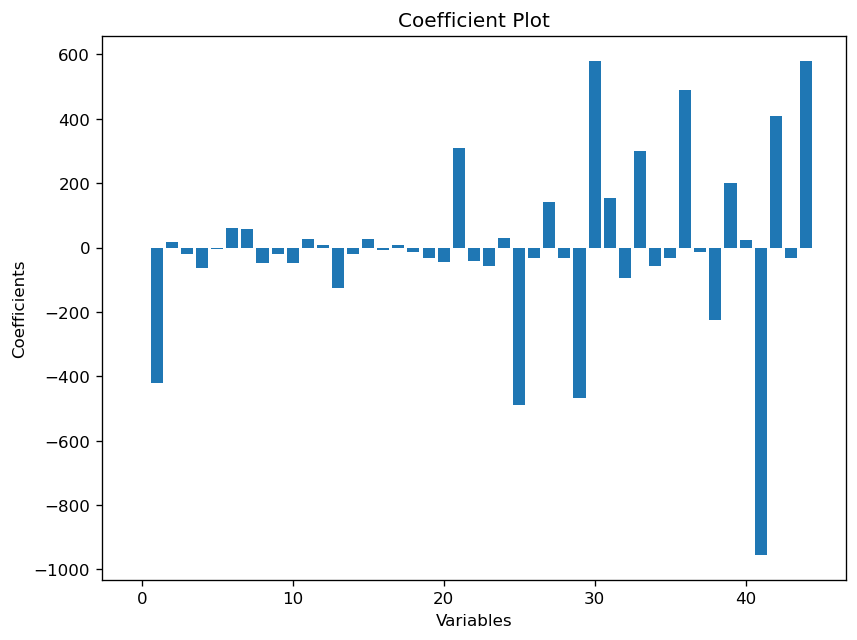

In [13]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient Plot')

Here we can see that the model depends upon some Independent variables too much, But these coefficients are not suitable for interpretation because these are not scaled, therefore we will perform the interpretation in this note book later.

## Checking assumptions of Linear Model

In [14]:
#Arraging and calculating the residuals
residuals = pd.DataFrame({
    'actual_values' : y_test,
    'predicted_values' : test_pred
})
residuals['residuals'] = residuals['actual_values'] - residuals['predicted_values']
residuals.head(10)

,actual_values,predicted_values,residuals
7503,1743.0644,1363.736254,379.328146
2957,356.8688,721.683306,-364.814506
7031,377.5086,885.314916,-507.806316
1084,5778.4782,4239.234147,1539.244053
856,2356.9320,3345.973124,-989.041124
4304,865.5400,614.580480,250.959520
2132,4613.9940,4761.292724,-147.298724
1385,2410.8618,2070.219947,340.641853
5239,1948.1308,1404.801277,543.329523
6516,1937.4780,2824.532364,-887.054364


### Assumption 1 : Homoscedasticity(Is there constant Variance OR Homoscedastic?)

### Plotting Residual Curve

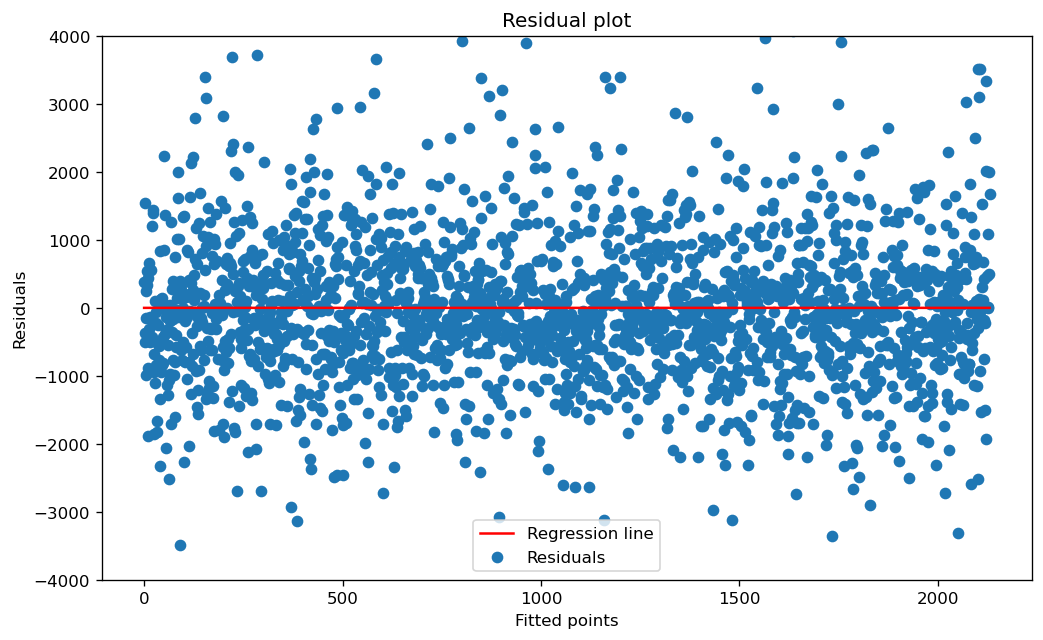

In [15]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0, 2131)  #2131 is a length of residuals dataframe
k = [0 for i in range(0, 2131)]
plt.scatter(f, residuals['residuals'], label='Residuals')
plt.plot(f, k, color='red', label='Regression line')   #to draw a striaght line
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

### Assumption 2 : Distribution of Errors(Are errors normally distributed or not?)

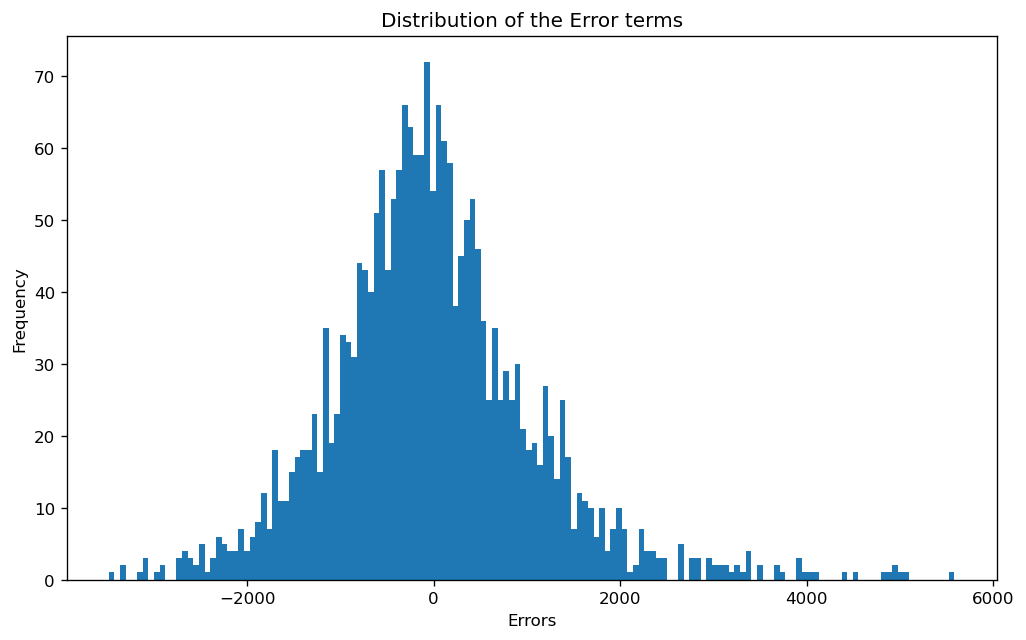

In [16]:
#Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals['residuals'], bins=150)
plt.xlabel("Errors")
plt.ylabel('Frequency')
plt.title('Distribution of the Error terms')
plt.show()

According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors.

### QQ-Plot (Are the Erros Normally Distributed?)

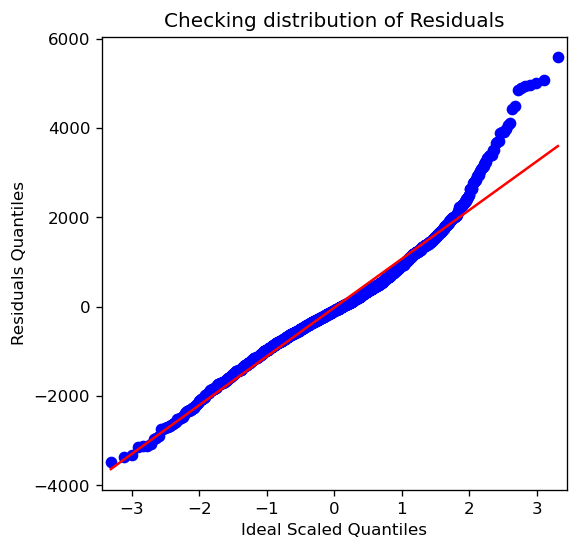

In [17]:
#Importing the QQ plot from the statsmodels
from statsmodels.graphics.gofplots import qqplot
#Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
qqplot(residuals['residuals'], line='s', ax=ax)
plt.ylabel('Residuals Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residuals')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there are some outliers on the higher end of the Residues.

### Assumption 3 : Multi collinearity(Is there any multi collinearity in our data)

### Variance Inflation Factor(VIF) - Checking for a Multi Collinearity

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

<img src="vif.png">

In [18]:
#Importing variance_inflation_factor function from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Calculating VIF for every column(only works for non-categorical)
VIF = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index=df.columns)
VIF

C:\Users\admin\conda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

From this list, we clearly see that there happens to be no Independent Variable over the value of 5, which means that there are no features that exhibit the Multicollinearity in the dataset. Note that VIF only works for the Continuous Variables. 

## Model Interpretability

So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [19]:
#Creating a instance of Linear Regression
lr = LinearRegression(normalize=True)
#Fitting the model
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [20]:
#Predicting over a train set and calculating an error
train_pred = lr.predict(X_train)
print("Mean Absolute Error for Train set : ", mean_absolute_error(train_pred, y_train))

Mean Absolute Error for Train set :  845.7872691489363


In [21]:
#Predicting over a test set and calculating an error
test_pred = lr.predict(X_test)
print('Mean Absolute Error for Test set : ', mean_absolute_error(test_pred, y_test))

Mean Absolute Error for Test set :  802.1700058188643


### Parameters of Linear Regression

In [22]:
lr.coef_

array([-1.85847287e+00, -4.22725698e+02,  1.57135562e+01,  1.32948381e+14,
        3.02421999e+13,  3.02421999e+13,  3.02421999e+13,  3.02421999e+13,
        3.02421999e+13,  1.14652418e+13,  1.14652418e+13,  1.14652418e+13,
        1.14652418e+13,  1.14652418e+13,  1.14652418e+13,  1.14652418e+13,
        1.14652418e+13,  1.14652418e+13,  1.14652418e+13,  1.14652418e+13,
        1.14652418e+13,  1.14652418e+13,  1.14652418e+13,  1.14652418e+13,
        1.14652418e+13, -2.04682575e+15,  1.57623936e+15,  6.35281541e+14,
       -8.29808401e+14, -8.15581286e+14,  8.48607309e+14,  1.12601582e+15,
        1.30002345e+15, -7.54163279e+14, -2.95891624e+14, -5.03834338e+14,
       -8.16057555e+14, -9.18891385e+13, -1.07378613e+13, -2.82155563e+15,
       -5.99711488e+14,  1.03375100e+15, -6.23047579e+14, -8.29640986e+14,
        6.82704448e+14])

In [23]:
lr.intercept_

-2.640597864675089e+17

### Plotting the coefficients

Text(0.5, 1.0, 'Normalized coefficient plot')

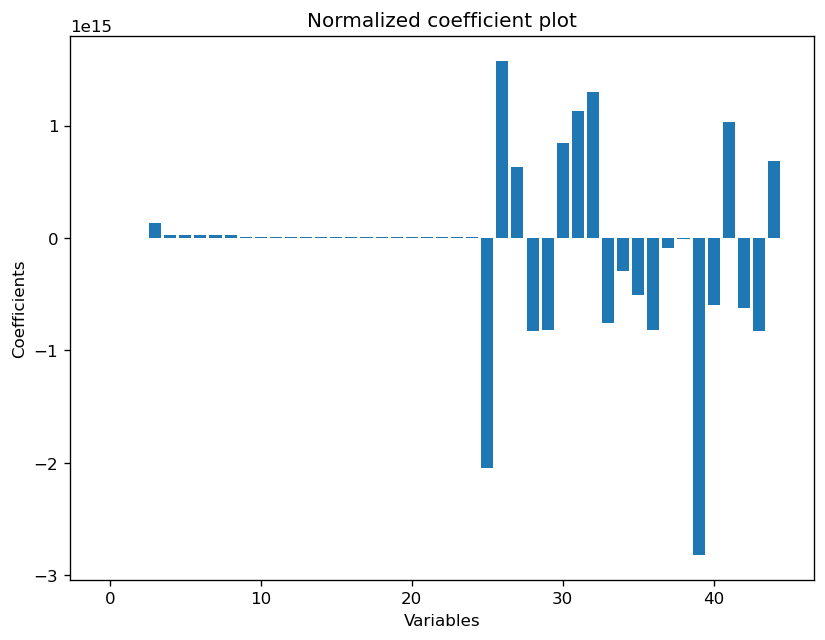

In [24]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel('Variables')
plt.ylabel("Coefficients")
plt.title('Normalized coefficient plot')

Now the coefficients we see are normalised and we can easily make final inferences out of it.

Here we can see that there are a lot of Coefficients which are near to zero and not Significant.
So let us try removing them and build the model again.

### Creating a new subset of a data

In [25]:
#Seperating independent and dependent variables
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

### Arranging coefficients with features

In [26]:
Coefficients = pd.DataFrame({
    'variable' : X.columns,
    'coefficient' : lr.coef_
})
Coefficients.head(10)

,variable,coefficient
0,Item_Weight,-1.858473e+00
1,Item_Visibility,-4.227257e+02
2,Item_MRP,1.571356e+01
3,Outlet_Establishment_Year,1.329484e+14
4,Item_Fat_Content_LF,3.024220e+13
5,Item_Fat_Content_Low Fat,3.024220e+13
6,Item_Fat_Content_Regular,3.024220e+13
7,Item_Fat_Content_low fat,3.024220e+13
8,Item_Fat_Content_reg,3.024220e+13
9,Item_Type_Baking Goods,1.146524e+13


### Chossing variables with sigificance greater than 0.5 ( Filtering Significant Features)

In [27]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

### Extracting the significant subset do independent Variables

In [28]:
subset = df[sig_var['variable'].values]
subset.head()

,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
0,249.8092,1999,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48.2692,2009,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,141.6180,1999,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,182.0950,1998,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,53.8614,1987,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Splitting the data into a Train and Test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(subset, y, random_state=42)

### Training a model

In [30]:
#Create a instance of Linear Regression with normalized data
lr = LinearRegression()
#Fitting a model
lr.fit(X_train, y_train)

LinearRegression()

### Make prediction for Train data

In [31]:
#Predicting over the Train set and calculating an error
train_pred = lr.predict(X_train)
print("Mean Absolute Error for Train Set : ", mean_absolute_error(train_pred, y_train))

Mean Absolute Error for Train Set :  847.5024046811338


### Make prediction for Test data

In [32]:
#Predicting over the Test set and calculating an error
test_pred = lr.predict(X_test)
print("Mean Absolute Error for Test set : ", mean_absolute_error(test_pred, y_test))

Mean Absolute Error for Test set :  805.5407682889153


### Parameters of Linear Regression

In [33]:
lr.coef_

array([   15.71148462,   -16.86171874,   -68.69555651,    -2.31225856,
          61.97526466,    53.59515097,   -44.56260056,   -23.1327117 ,
         -46.26768167,    21.52143323,     6.3383911 ,  -133.96238014,
         -21.35891723,    27.1686787 ,     5.19890726,    13.11843877,
         -12.69722153,   -31.00135728,   -46.44562013,   305.70101618,
         -43.24444991,   -53.43437041,    32.49784477,  -113.69671175,
         231.00401799,   613.08173074,   232.51317016,     4.34104128,
       -2030.14474534,   613.08173074])

In [34]:
lr.intercept_

33745.41829200707

### Plotting the coefficients

Text(0.5, 1.0, 'Normalized Coefficient Plot')

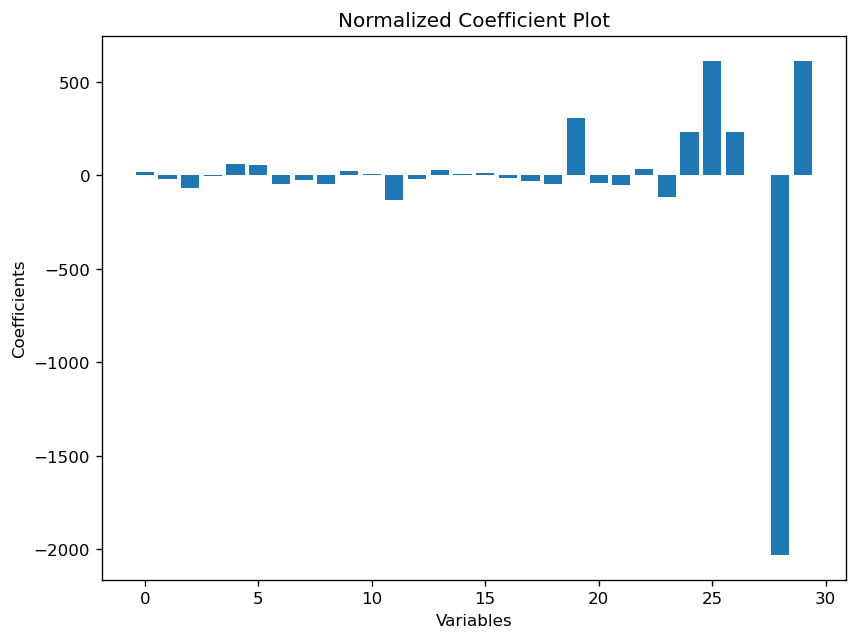

In [35]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient Plot')